__Задание 1__

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки
sklearn. 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Создайте датафреймы X и y из этих данных

In [5]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
y = pd.Series(boston.target, name='MEDV')
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test,
y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен
42.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размерности выборок:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Размерности выборок:
X_train: (404, 13)
X_test: (102, 13)
y_train: (404,)
y_test: (102,)


Масштабируйте данные с помощью StandardScaler.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2,
learning_rate=250, random_state=42.

In [12]:
from sklearn.manifold import TSNE

In [13]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Постройте диаграмму рассеяния на этих данных.

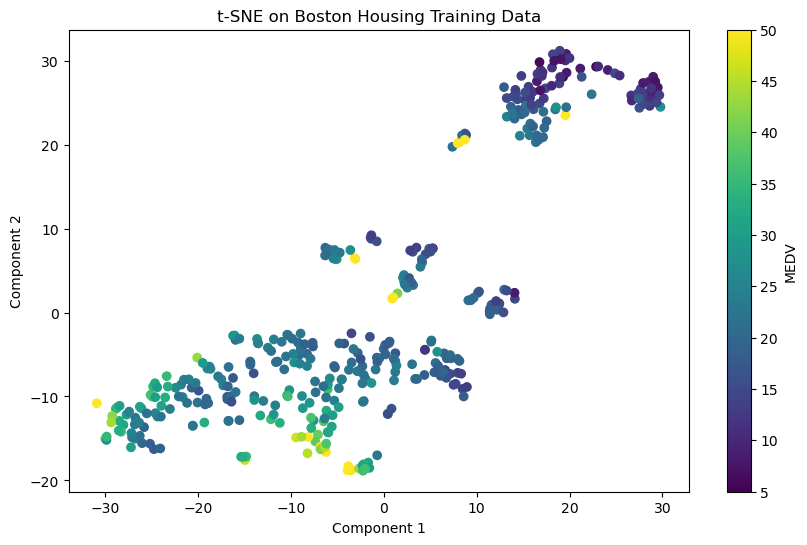

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.colorbar(label='MEDV')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE on Boston Housing Training Data')
plt.show()

__Задание 2__

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train. Параметр max_iter должен быть
равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [18]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

In [21]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [22]:
X_train_tsne_df = pd.DataFrame(X_train_tsne, columns=['Component 1', 'Component 2'])
X_train_tsne_df['Cluster'] = clusters
X_train_tsne_df['Price'] = y_train.values
X_train_tsne_df['CRIM'] = X_train['CRIM'].values

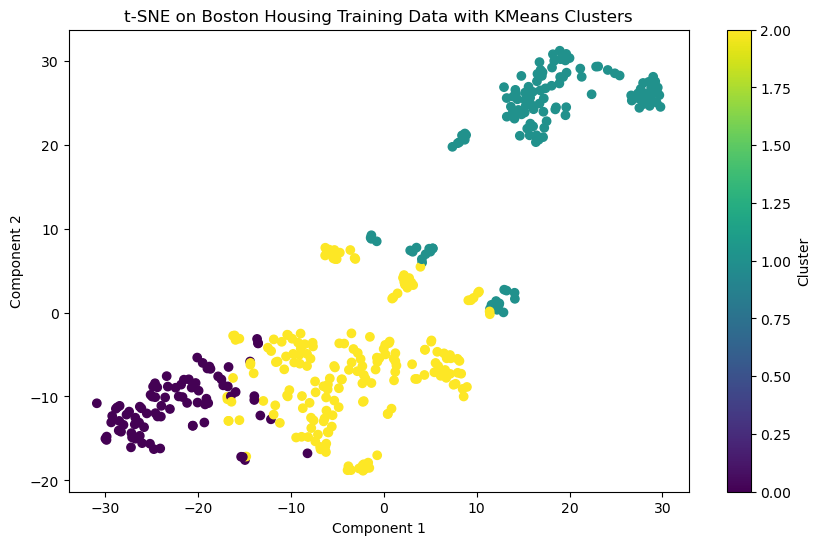

In [23]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_tsne_df['Component 1'], X_train_tsne_df['Component 2'], 
                      c=X_train_tsne_df['Cluster'], cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE on Boston Housing Training Data with KMeans Clusters')
plt.show()

In [24]:
cluster_means = X_train_tsne_df.groupby('Cluster')[['Price', 'CRIM']].mean()
print("Средние значения price и CRIM в разных кластерах:")
print(cluster_means)

Средние значения price и CRIM в разных кластерах:
             Price       CRIM
Cluster                      
0        27.788372   0.073566
1        16.165354  10.797028
2        24.958115   0.421660


__Задание 3__

Примените модель KMeans, построенную в предыдущем задании, к данным из
тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [26]:
clusters_test = kmeans.fit_predict(X_test_scaled)

In [27]:
X_test_df = pd.DataFrame(X_test_scaled, columns=boston.feature_names)
X_test_df['Cluster'] = clusters_test
X_test_df['Price'] = y_test.values
X_test_df['CRIM'] = X_test['CRIM'].values

In [29]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [30]:
X_test_tsne_df = pd.DataFrame(X_test_tsne, columns=['Component 1', 'Component 2'])
X_test_tsne_df['Cluster'] = clusters_test
X_test_tsne_df['Price'] = y_test.values
X_test_tsne_df['CRIM'] = X_test['CRIM'].values

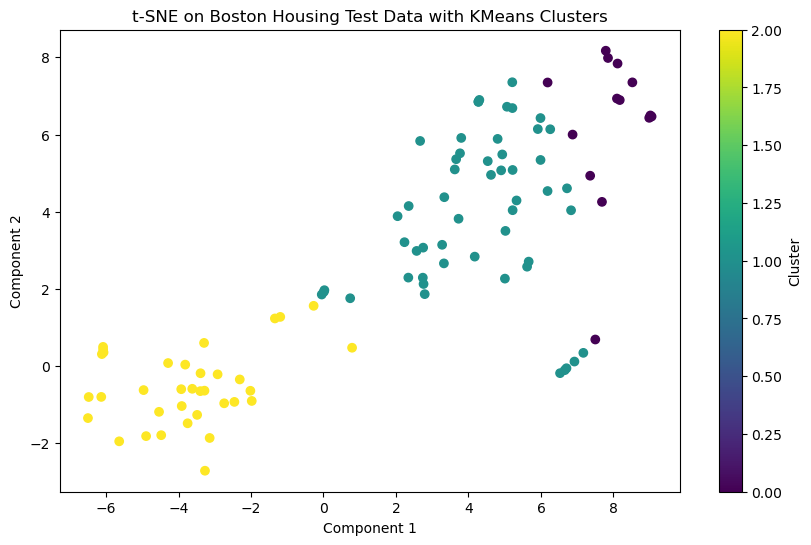

In [31]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test_tsne_df['Component 1'], X_test_tsne_df['Component 2'], 
                      c=X_test_tsne_df['Cluster'], cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE on Boston Housing Test Data with KMeans Clusters')
plt.show()

In [32]:
cluster_means_test = X_test_tsne_df.groupby('Cluster')[['Price', 'CRIM']].mean()
print("Средние значения price и CRIM в разных кластерах на тестовых данных:")
print(cluster_means_test)

Средние значения price и CRIM в разных кластерах на тестовых данных:
             Price       CRIM
Cluster                      
0        33.871429   0.086186
1        21.552830   0.252007
2        16.437143  10.165531
